In [ ]:
%pip install tensorflow

  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.4-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached wrapt-1.17.2-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached grpcio-1.71.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.9.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached h

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import pandas as pd

First, we'll load the MNIST dataset, normalize the pixel values to [0, 1], and prepare the data for our models.


## 1. Data Preprocessing

# Option 1: Load MNIST using TensorFlow

In [12]:
def load_mnist_tensorflow():
    print("Loading MNIST dataset using TensorFlow...")
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    
    # Normalize pixel values to [0, 1]
    x_train = x_train / 255.0
    x_test = x_test / 255.0
    
    # Flatten images to 1D vectors
    x_train_flattened = x_train.reshape(x_train.shape[0], -1)
    x_test_flattened = x_test.reshape(x_test.shape[0], -1)
    
    # Print dataset shapes
    print(f"Training data shape: {x_train_flattened.shape}")
    print(f"Test data shape: {x_test_flattened.shape}")
    print(f"Training labels shape: {y_train.shape}")
    print(f"Test labels shape: {y_test.shape}")
    
    return x_train, y_train, x_test, y_test, x_train_flattened, x_test_flattened

# Option 2: Load MNIST using Scikit-learn (smaller dataset)


In [13]:
def load_mnist_sklearn():
    print("Loading MNIST dataset using Scikit-learn...")
    from sklearn.datasets import load_digits
    
    digits = load_digits()
    x = digits.data / 16.0  # Normalize to [0, 1]
    y = digits.target
    
    # Split into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    # Print dataset shapes
    print(f"Training data shape: {x_train.shape}")
    print(f"Test data shape: {x_test.shape}")
    print(f"Training labels shape: {y_train.shape}")
    print(f"Test labels shape: {y_test.shape}")
    
    return x_train, y_train, x_test, y_test, x_train, x_test

# Load the dataset using TensorFlow (since we want the full MNIST dataset)

In [14]:
x_train, y_train, x_test, y_test, x_train_flattened, x_test_flattened = load_mnist_tensorflow()

Loading MNIST dataset using TensorFlow...
Training data shape: (60000, 784)
Test data shape: (10000, 784)
Training labels shape: (60000,)
Test labels shape: (10000,)


# Visualize some of the training examples

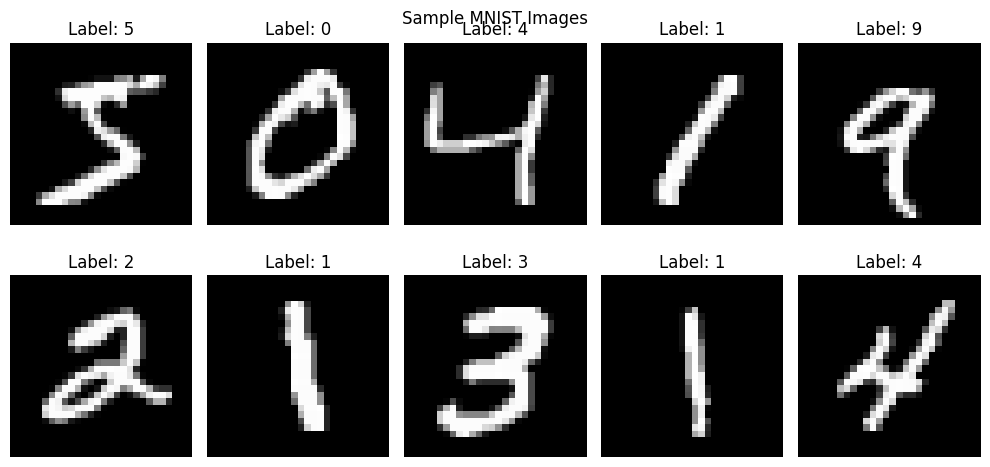

In [15]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.suptitle("Sample MNIST Images")
plt.show()

## 2. Scikit-learn Implementation (MLPClassifier)

Now we'll implement a neural network using Scikit-learn's MLPClassifier.

In [16]:
def train_sklearn_mlp(hidden_layer_sizes=(128,), activation='relu', max_iter=50, batch_size=128, experiment_name="Default"):
    print(f"\nExperiment name: {experiment_name}")
    print(f"Hidden layer sizes: {hidden_layer_sizes}")
    print(f"Activation: {activation}")
    print(f"Max iterations: {max_iter}")
    print(f"Batch size: {batch_size}")
    
    mlp = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        solver='adam',
        max_iter=max_iter,
        batch_size=batch_size,
        random_state=42,
        verbose=True
    )
    
    start_time = time.time()
    
    mlp.fit(x_train_flattened, y_train)
    
    training_time = time.time() - start_time
    print(f"Training time: {training_time:.2f} seconds")
    
    # Evaluate on test set
    y_pred = mlp.predict(x_test_flattened)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test accuracy: {accuracy:.4f}")
    
    return mlp, accuracy, training_time, y_pred, experiment_name


Experiment name: Single Layer (128 neurons, ReLU)
Hidden layer sizes: (128,)
Activation: relu
Max iterations: 50
Batch size: 128
Iteration 1, loss = 0.36614131
Iteration 2, loss = 0.17130032
Iteration 3, loss = 0.12357664
Iteration 4, loss = 0.09521219
Iteration 5, loss = 0.07712691
Iteration 6, loss = 0.06364669
Iteration 7, loss = 0.05262674
Iteration 8, loss = 0.04447284
Iteration 9, loss = 0.03725003
Iteration 10, loss = 0.03188531
Iteration 11, loss = 0.02738476
Iteration 12, loss = 0.02346555
Iteration 13, loss = 0.02048463
Iteration 14, loss = 0.01708583
Iteration 15, loss = 0.01402912
Iteration 16, loss = 0.01245047
Iteration 17, loss = 0.01051669
Iteration 18, loss = 0.00894668
Iteration 19, loss = 0.00805418
Iteration 20, loss = 0.00777333
Iteration 21, loss = 0.00623531
Iteration 22, loss = 0.00666572
Iteration 23, loss = 0.00483596
Iteration 24, loss = 0.00511167
Iteration 25, loss = 0.00706406
Iteration 26, loss = 0.00317242
Iteration 27, loss = 0.00251199
Iteration 28, l

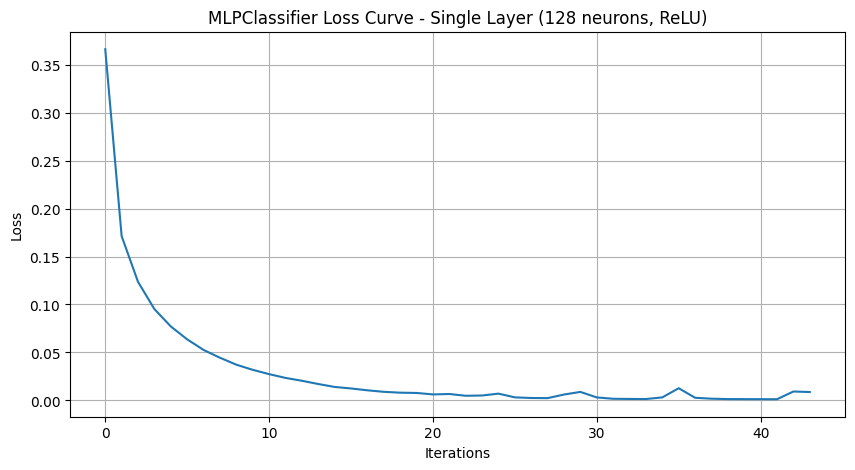

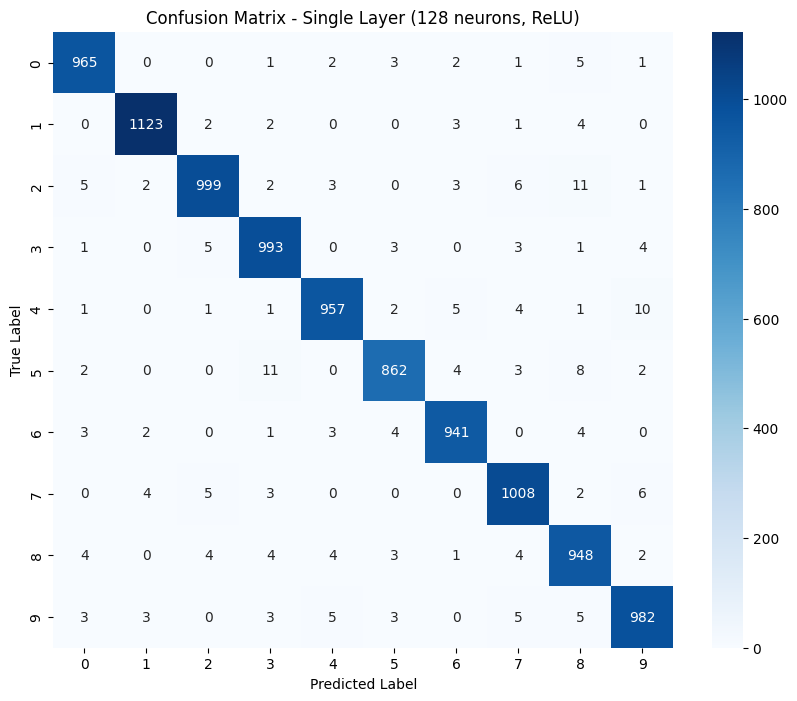


Classification Report - Single Layer (128 neurons, ReLU):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.96      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


Experiment name: Two Layers (128+64 neurons, ReLU)
Hidden layer sizes: (128, 64)
Activation: relu
Max iterations: 50
Batch size: 128
Iteration 1, loss = 0.33065151
Iteration 2, loss

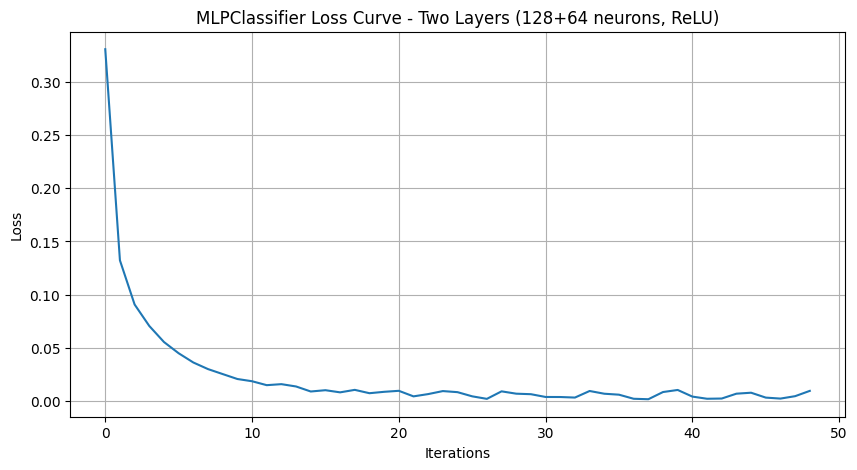

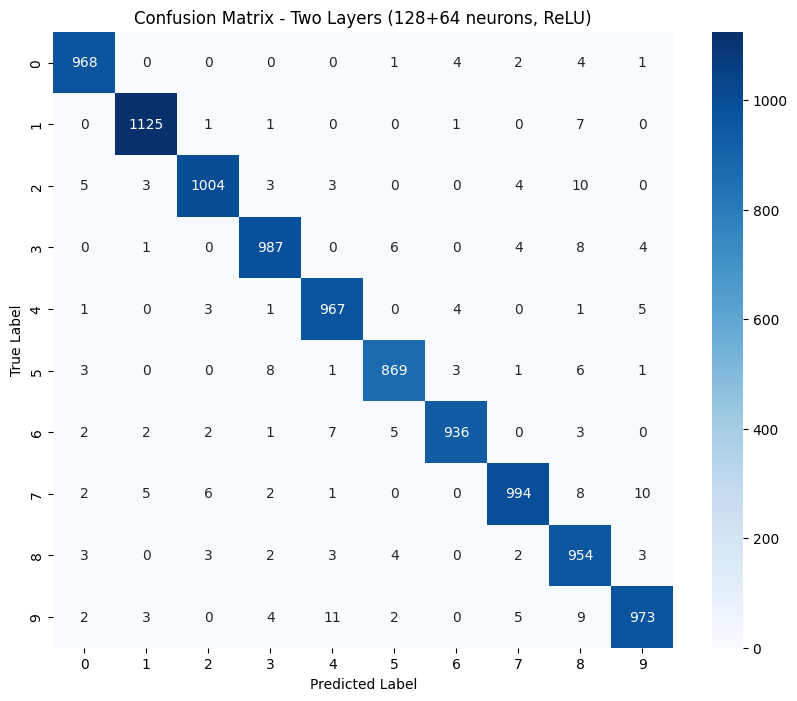


Classification Report - Two Layers (128+64 neurons, ReLU):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.94      0.98      0.96       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


Experiment name: Three Layers (128+64+32 neurons, ReLU)
Hidden layer sizes: (128, 64, 32)
Activation: relu
Max iterations: 50
Batch size: 128
Iteration 1, loss = 0.34319627
Iterati

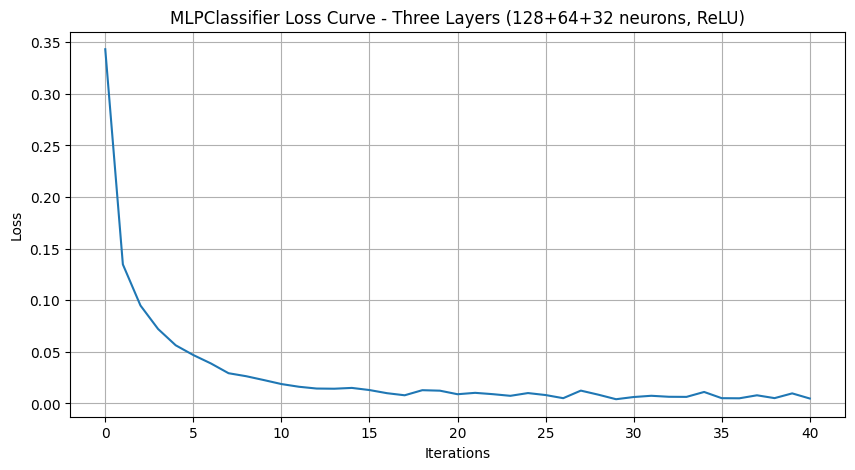

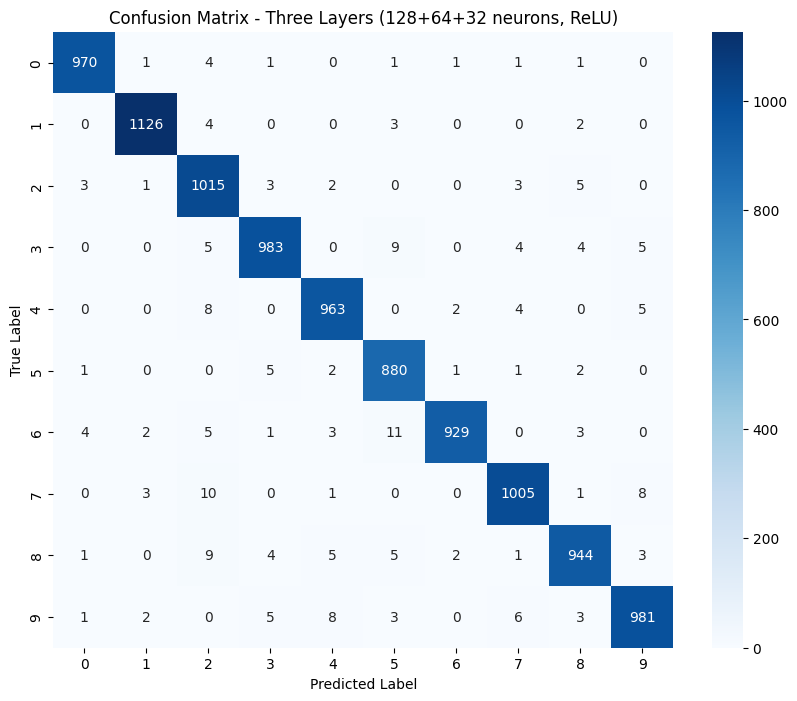


Classification Report - Three Layers (128+64+32 neurons, ReLU):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.98      0.97      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.96      0.99      0.98       892
           6       0.99      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


Experiment name: Single Layer (128 neurons, Tanh)
Hidden layer sizes: (128,)
Activation: tanh
Max iterations: 50
Batch size: 128
Iteration 1, loss = 0.37586273
Iteration 2, lo

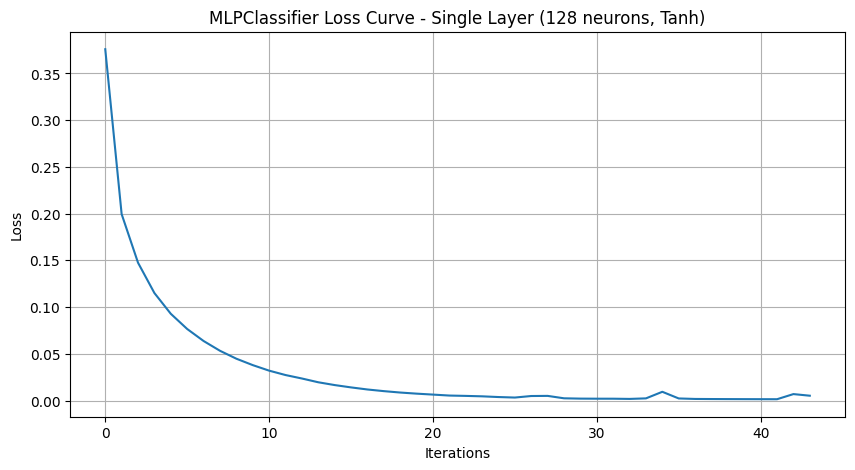

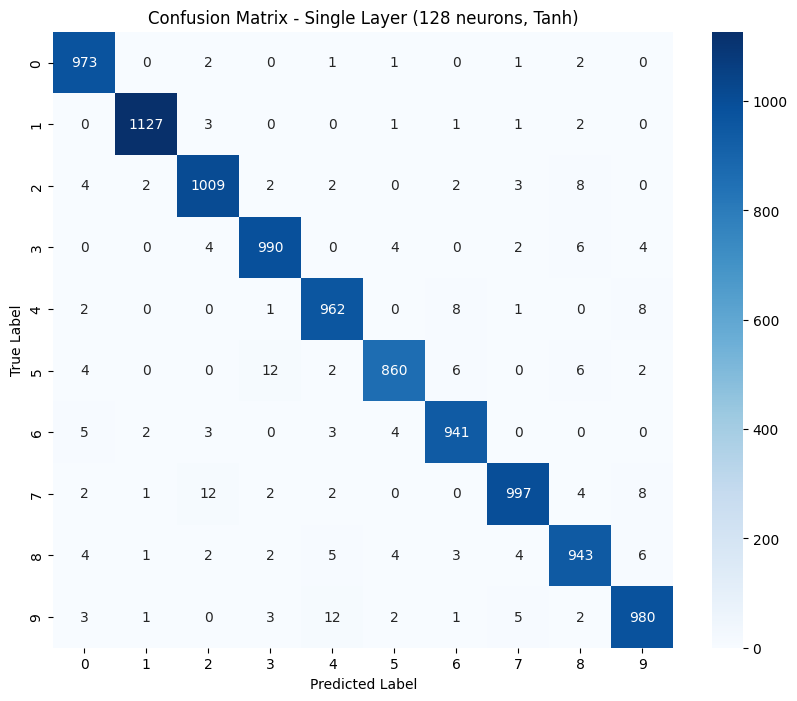


Classification Report - Single Layer (128 neurons, Tanh):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


Experiment name: Single Layer (128 neurons, Logistic)
Hidden layer sizes: (128,)
Activation: logistic
Max iterations: 50
Batch size: 128
Iteration 1, loss = 0.65949483
Iteration 2, 

d:\facultate\Semestrul 4\FML\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Test accuracy: 0.9788


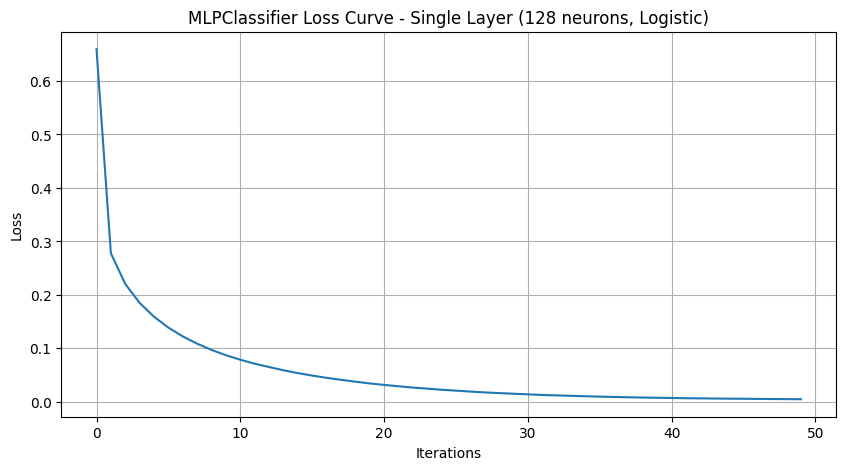

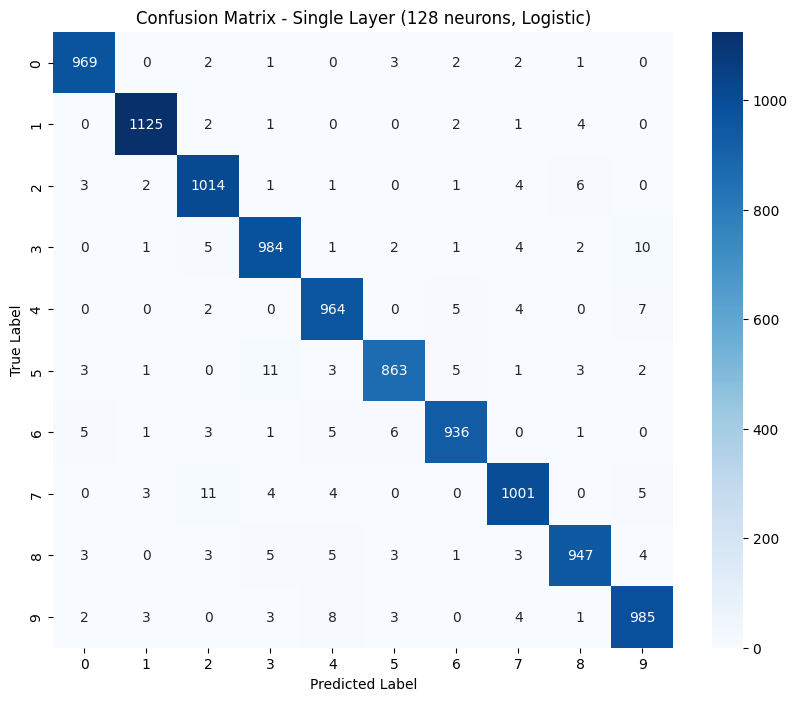


Classification Report - Single Layer (128 neurons, Logistic):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


Scikit-learn Experiments Comparison:
                               Experiment  Num Hidden Layers  \
0        Single Layer (128 neurons, ReLU)                  1   
1       Two 

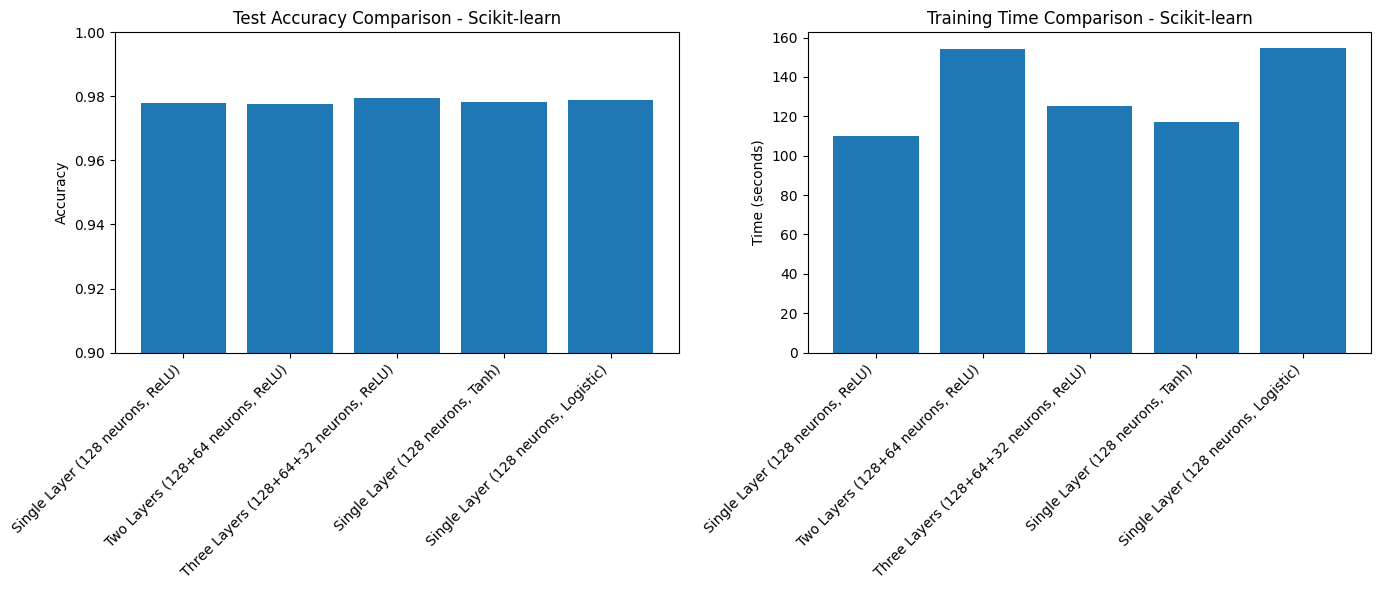


Best Scikit-learn model: Three Layers (128+64+32 neurons, ReLU) with accuracy 0.9796


In [ ]:
def run_sklearn_experiments():
    experiments = [
        {
            "name": "Single Layer (128 neurons, ReLU)",
            "hidden_layer_sizes": (128,),
            "activation": "relu"
        },
        {
            "name": "Two Layers (128+64 neurons, ReLU)",
            "hidden_layer_sizes": (128, 64),
            "activation": "relu"
        },
        {
            "name": "Three Layers (128+64+32 neurons, ReLU)",
            "hidden_layer_sizes": (128, 64, 32),
            "activation": "relu"
        },
        {
            "name": "Single Layer (128 neurons, Tanh)",
            "hidden_layer_sizes": (128,),
            "activation": "tanh"
        },
        {
            "name": "Single Layer (128 neurons, Logistic)",
            "hidden_layer_sizes": (128,),
            "activation": "logistic"
        }
    ]
    
    results = []
    
    for exp in experiments:
        model, accuracy, training_time, predictions, name = train_sklearn_mlp(
            hidden_layer_sizes=exp["hidden_layer_sizes"],
            activation=exp["activation"],
            experiment_name=exp["name"]
        )
        
        # Plot the loss curve
        plt.figure(figsize=(10, 5))
        plt.plot(model.loss_curve_)
        plt.title(f'MLPClassifier Loss Curve - {name}')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.grid(True)
        plt.show()
        
        # Create a confusion matrix
        cm = confusion_matrix(y_test, predictions)
        
        # Plot the confusion matrix
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {name}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()
        
        # Print classification report
        print(f"\nClassification Report - {name}:")
        print(classification_report(y_test, predictions))
        
        # Store results for comparison
        results.append({
            "name": name,
            "model": model,
            "accuracy": accuracy,
            "training_time": training_time,
            "hidden_layer_sizes": exp["hidden_layer_sizes"],
            "activation": exp["activation"],
            "num_layers": len(exp["hidden_layer_sizes"])
        })
    
    # Create a comparison table
    comparison_data = []
    for result in results:
        comparison_data.append({
            "Experiment": result["name"],
            "Num Hidden Layers": result["num_layers"],
            "Hidden Layer Sizes": result["hidden_layer_sizes"],
            "Activation": result["activation"],
            "Test Accuracy": result["accuracy"],
            "Training Time (s)": result["training_time"]
        })
    
    comparison_df = pd.DataFrame(comparison_data)
    print("\nScikit-learn Experiments Comparison:")
    print(comparison_df)
    
    # Plot comparison of results
    plt.figure(figsize=(14, 6))
    
    # Accuracy comparison
    plt.subplot(1, 2, 1)
    plt.bar(comparison_df["Experiment"], comparison_df["Test Accuracy"])
    plt.title('Test Accuracy Comparison - Scikit-learn')
    plt.ylabel('Accuracy')
    plt.ylim(0.9, 1.0)
    plt.xticks(rotation=45, ha='right')
    
    # Training time comparison
    plt.subplot(1, 2, 2)
    plt.bar(comparison_df["Experiment"], comparison_df["Training Time (s)"])
    plt.title('Training Time Comparison - Scikit-learn')
    plt.ylabel('Time (seconds)')
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    
    return comparison_df, results
    
sklearn_comparison_df, sklearn_results = run_sklearn_experiments()
best_sklearn_model = max(sklearn_results, key=lambda x: x["accuracy"])
print(f"\nBest Scikit-learn model: {best_sklearn_model['name']} with accuracy {best_sklearn_model['accuracy']:.4f}")

## 3. TensorFlow Implementation

In [18]:
def create_tensorflow_model(hidden_layers=[(128, 'relu')], experiment_name="Default"):
    print(f"\nExperiment name: {experiment_name}")
    print(f"Hidden layers: {hidden_layers}")
    
    model = Sequential()
    
    model.add(Flatten(input_shape=(28, 28)))
    
    # Add hidden layers
    for units, activation in hidden_layers:
        model.add(Dense(units, activation=activation))
    
    # Add the output layer
    model.add(Dense(10, activation='softmax'))
    
    # Compile the model
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Print a summary of the model architecture
    model.summary()
    
    return model

In [19]:
def train_tensorflow_model(model, validation_split=0.2, learning_rate=0.001, batch_size=128, epochs=10, experiment_name="Default"):
    print(f"\nExperiment name {experiment_name}")
    print(f"Validation split: {validation_split}")
    print(f"Learning rate: {learning_rate}")
    print(f"Batch size: {batch_size}")
    print(f"Epochs: {epochs}")
    
    # Create optimizer with specified learning rate
    optimizer = Adam(learning_rate=learning_rate)
    
    # Recompile model with the new optimizer
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Start timing
    start_time = time.time()
    
    # Train the model
    history = model.fit(
        x_train, y_train,
        validation_split=validation_split,
        batch_size=batch_size,
        epochs=epochs,
        verbose=1
    )
    
    # End timing
    training_time = time.time() - start_time
    print(f"Training time: {training_time:.2f} seconds")
    
    # Evaluate on test set
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test accuracy: {test_accuracy:.4f}")
    
    return model, history, test_accuracy, training_time

In [20]:
def visualize_tf_results(model, history, experiment_name):
    # Plot training and validation accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Model Accuracy - {experiment_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='lower right')
    
    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Model Loss - {experiment_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.tight_layout()
    plt.show()
    
    # Make predictions
    y_pred = np.argmax(model.predict(x_test), axis=1)
    
    # Create a confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {experiment_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    # Print classification report
    print(f"\nClassification Report - {experiment_name}:")
    print(classification_report(y_test, y_pred))
    
    return y_pred


Experiment name: Single Layer (128 neurons, ReLU)
Hidden layers: [(128, 'relu')]


d:\facultate\Semestrul 4\FML\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)


Experiment name Single Layer (128 neurons, ReLU)
Validation split: 0.2
Learning rate: 0.001
Batch size: 128
Epochs: 10
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8072 - loss: 0.7002 - val_accuracy: 0.9430 - val_loss: 0.2130
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9472 - loss: 0.1925 - val_accuracy: 0.9587 - val_loss: 0.1500
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9606 - loss: 0.1336 - val_accuracy: 0.9637 - val_loss: 0.1205
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9707 - loss: 0.1023 - val_accuracy: 0.9681 - val_loss: 0.1052
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9775 - loss: 0.0810 - val_accuracy: 0.9697 - val_loss: 0.0980
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9803 - loss: 0.0689 - val_accuracy: 0.9731 - val_loss: 0.0928
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9839 - loss: 0.0563 - val_accuracy: 0.9726 - v

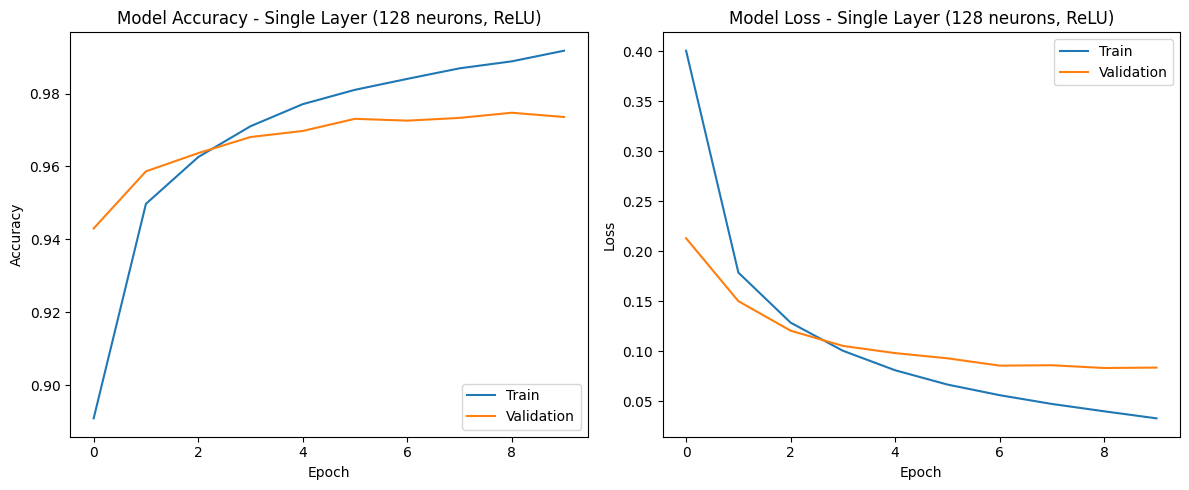

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step


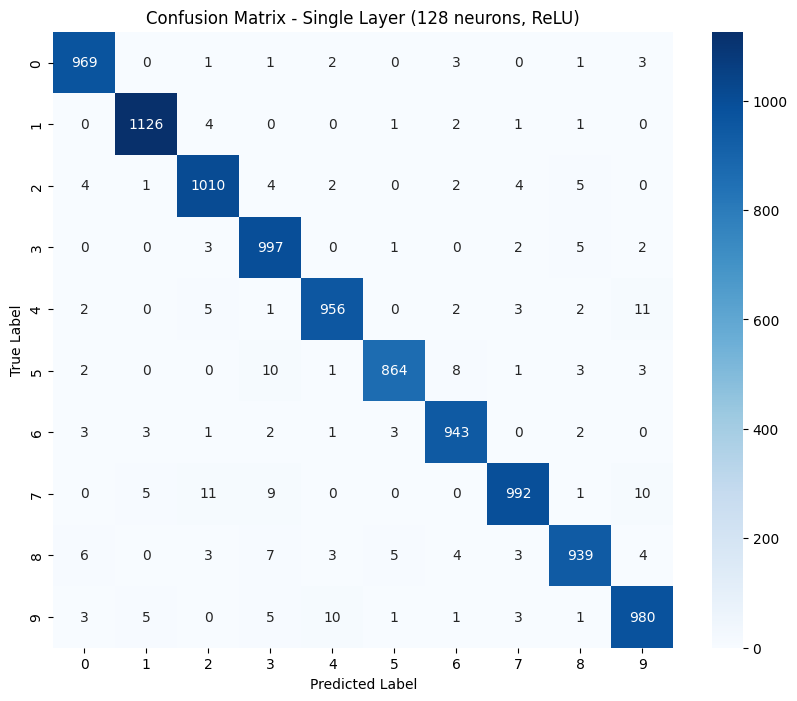


Classification Report - Single Layer (128 neurons, ReLU):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.96      0.99      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.98      0.96      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


Experiment name: Two Layers (128+64 neurons, ReLU)
Hidden layers: [(128, 'relu'), (64, 'relu')]


d:\facultate\Semestrul 4\FML\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


Experiment name Two Layers (128+64 neurons, ReLU)
Validation split: 0.2
Learning rate: 0.001
Batch size: 128
Epochs: 10
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7956 - loss: 0.7097 - val_accuracy: 0.9437 - val_loss: 0.1920
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9516 - loss: 0.1636 - val_accuracy: 0.9620 - val_loss: 0.1311
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9682 - loss: 0.1066 - val_accuracy: 0.9667 - val_loss: 0.1073
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9773 - loss: 0.0781 - val_accuracy: 0.9685 - val_loss: 0.1034
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9821 - loss: 0.0599 - val_accuracy: 0.9683 - val_loss: 0.0991
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9858 - loss: 0.0484 - val_accuracy: 0.9739 - val_loss: 0.0933
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9887 - loss: 0.0396 - val_accuracy: 0.9714 - 

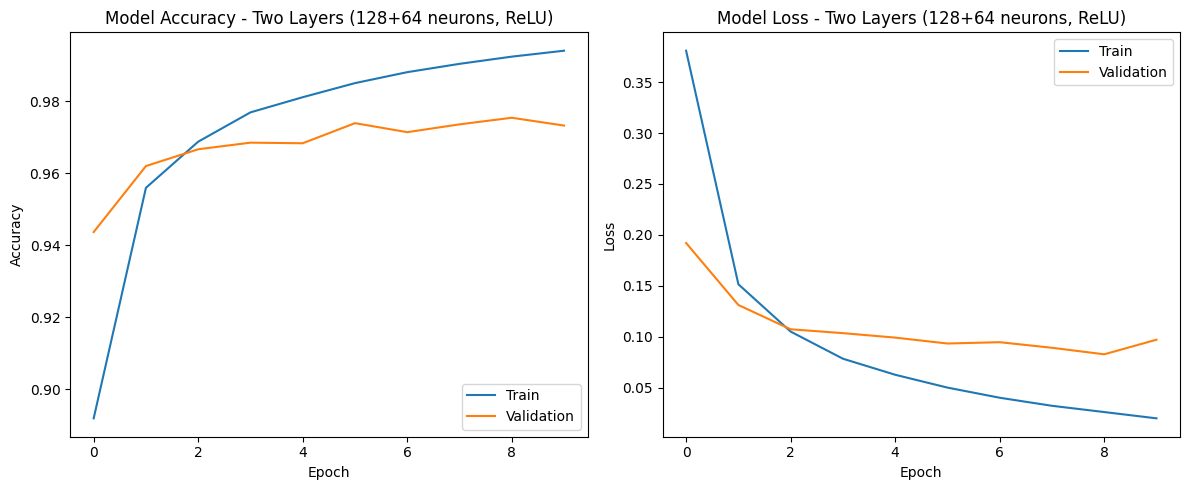

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step


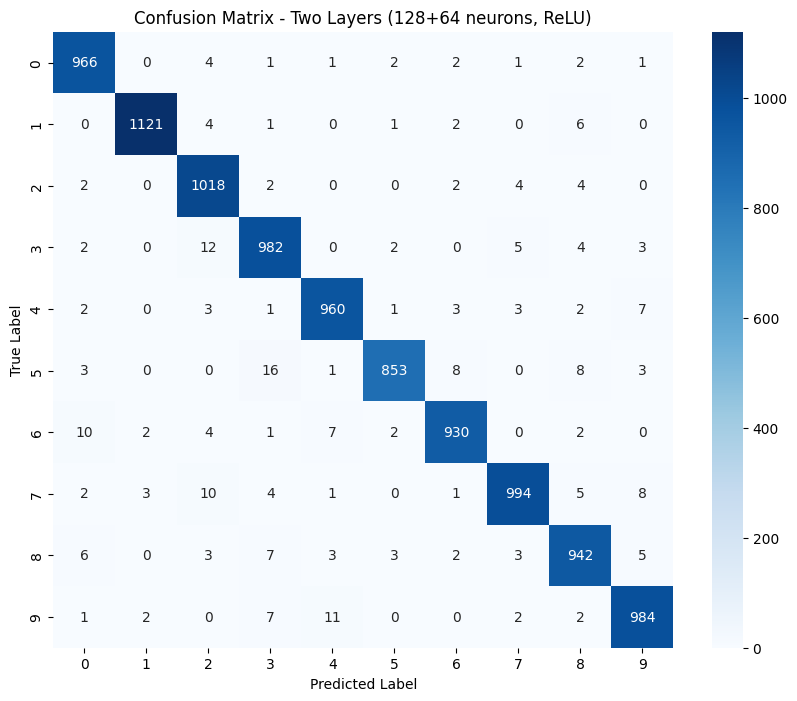


Classification Report - Two Layers (128+64 neurons, ReLU):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.99      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.96      0.97       892
           6       0.98      0.97      0.97       958
           7       0.98      0.97      0.97      1028
           8       0.96      0.97      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.98      0.97      0.97     10000
weighted avg       0.98      0.97      0.98     10000


Experiment name: Three Layers (128+64+32 neurons, ReLU)
Hidden layers: [(128, 'relu'), (64, 'relu'), (32, 'relu')]


d:\facultate\Semestrul 4\FML\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)


Experiment name Three Layers (128+64+32 neurons, ReLU)
Validation split: 0.2
Learning rate: 0.001
Batch size: 128
Epochs: 10
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7675 - loss: 0.7600 - val_accuracy: 0.9492 - val_loss: 0.1818
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9482 - loss: 0.1746 - val_accuracy: 0.9583 - val_loss: 0.1368
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9662 - loss: 0.1144 - val_accuracy: 0.9651 - val_loss: 0.1160
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9739 - loss: 0.0889 - val_accuracy: 0.9695 - val_loss: 0.1074
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9829 - loss: 0.0614 - val_accuracy: 0.9726 - val_loss: 0.0982
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9855 - loss: 0.0484 - val_accuracy: 0.9699 - val_loss: 0.0985
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9880 - loss: 0.0396 - val_accuracy: 0.97

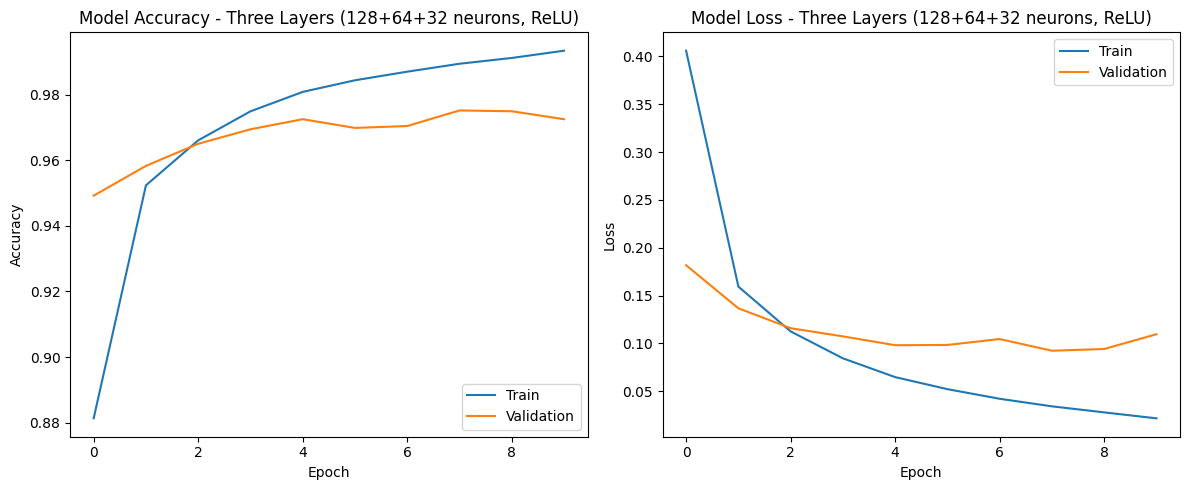

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step


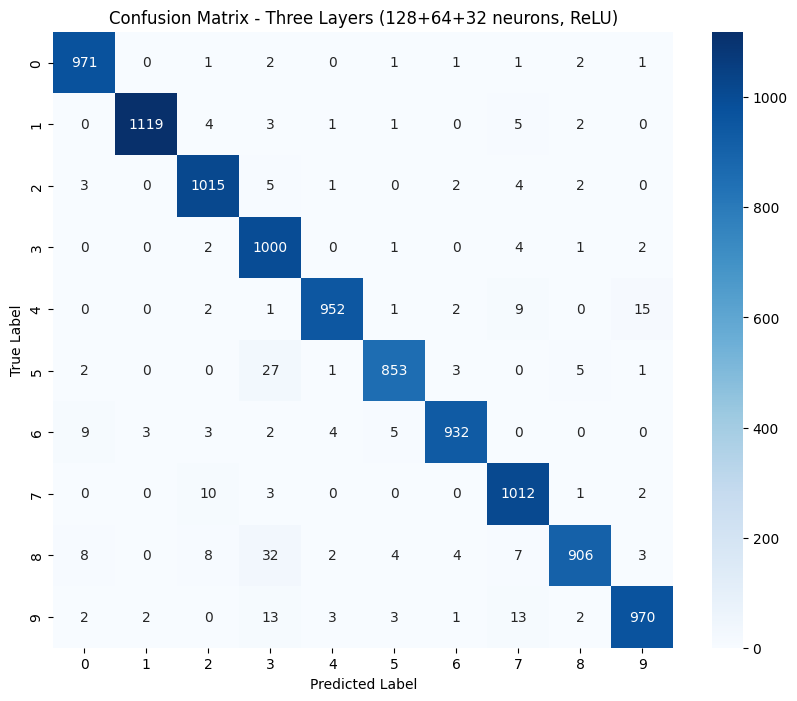


Classification Report - Three Layers (128+64+32 neurons, ReLU):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       1.00      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.92      0.99      0.95      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.96      0.97       892
           6       0.99      0.97      0.98       958
           7       0.96      0.98      0.97      1028
           8       0.98      0.93      0.96       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


Experiment name: Single Layer (128 neurons, Tanh)
Hidden layers: [(128, 'tanh')]


d:\facultate\Semestrul 4\FML\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)


Experiment name Single Layer (128 neurons, Tanh)
Validation split: 0.2
Learning rate: 0.001
Batch size: 128
Epochs: 10
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8156 - loss: 0.6598 - val_accuracy: 0.9325 - val_loss: 0.2442
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9330 - loss: 0.2352 - val_accuracy: 0.9481 - val_loss: 0.1869
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9507 - loss: 0.1741 - val_accuracy: 0.9556 - val_loss: 0.1567
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9623 - loss: 0.1326 - val_accuracy: 0.9640 - val_loss: 0.1335
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9699 - loss: 0.1084 - val_accuracy: 0.9646 - val_loss: 0.1236
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9756 - loss: 0.0887 - val_accuracy: 0.9682 - val_loss: 0.1103
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9785 - loss: 0.0785 - val_accuracy: 0.9694 - v

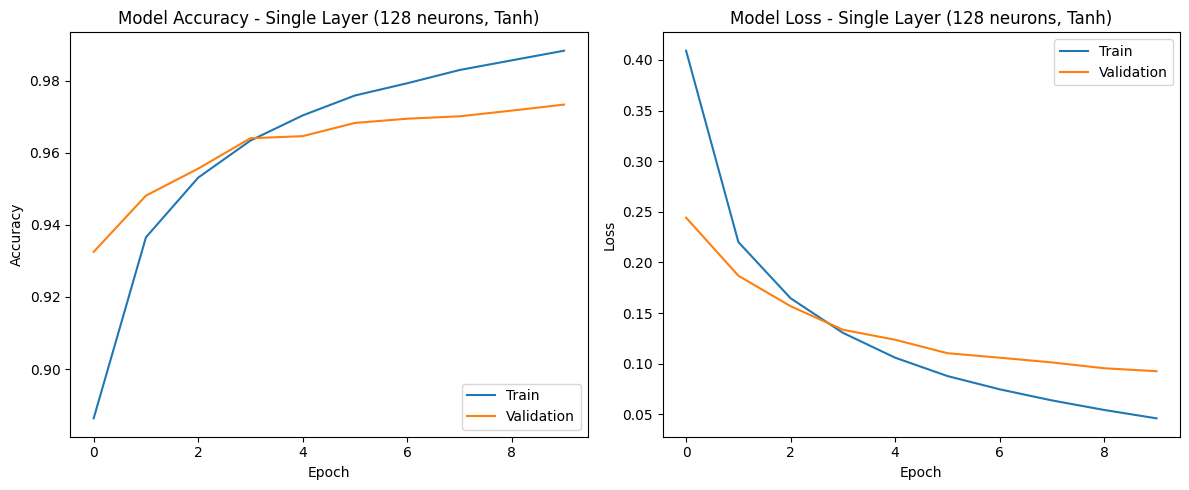

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step


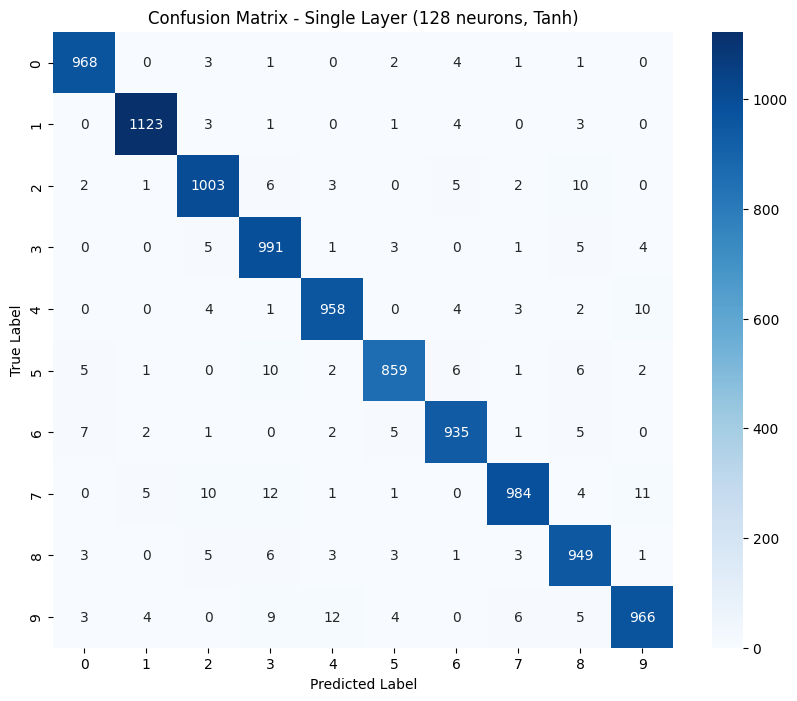


Classification Report - Single Layer (128 neurons, Tanh):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.96      0.97      0.97       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


Experiment name: Single Layer (128 neurons, Sigmoid)
Hidden layers: [(128, 'sigmoid')]


d:\facultate\Semestrul 4\FML\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)


Experiment name Single Layer (128 neurons, Sigmoid)
Validation split: 0.2
Learning rate: 0.001
Batch size: 128
Epochs: 10
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7346 - loss: 1.0848 - val_accuracy: 0.9108 - val_loss: 0.3328
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9137 - loss: 0.3221 - val_accuracy: 0.9291 - val_loss: 0.2560
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9267 - loss: 0.2598 - val_accuracy: 0.9378 - val_loss: 0.2224
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9388 - loss: 0.2177 - val_accuracy: 0.9460 - val_loss: 0.1960
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9480 - loss: 0.1814 - val_accuracy: 0.9504 - val_loss: 0.1791
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9521 - loss: 0.1641 - val_accuracy: 0.9542 - val_loss: 0.1639
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9586 - loss: 0.1447 - val_accuracy: 0.9573 

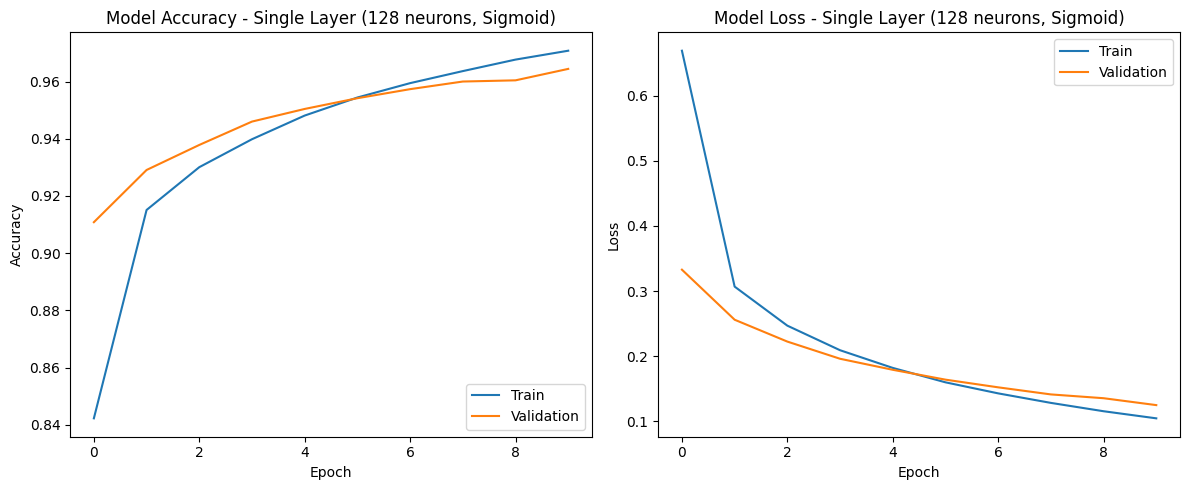

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step


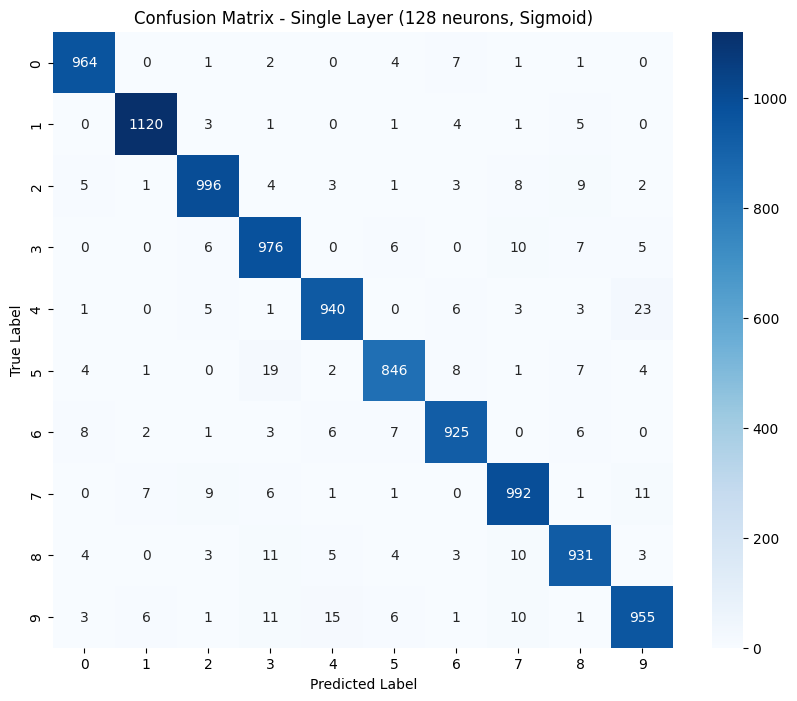


Classification Report - Single Layer (128 neurons, Sigmoid):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.94      0.97      0.95      1010
           4       0.97      0.96      0.96       982
           5       0.97      0.95      0.96       892
           6       0.97      0.97      0.97       958
           7       0.96      0.96      0.96      1028
           8       0.96      0.96      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000


TensorFlow Experiments Comparison:
                               Experiment  Num Hidden Layers  \
0        Single Layer (128 neurons, ReLU)                  1   
1       Two Lay

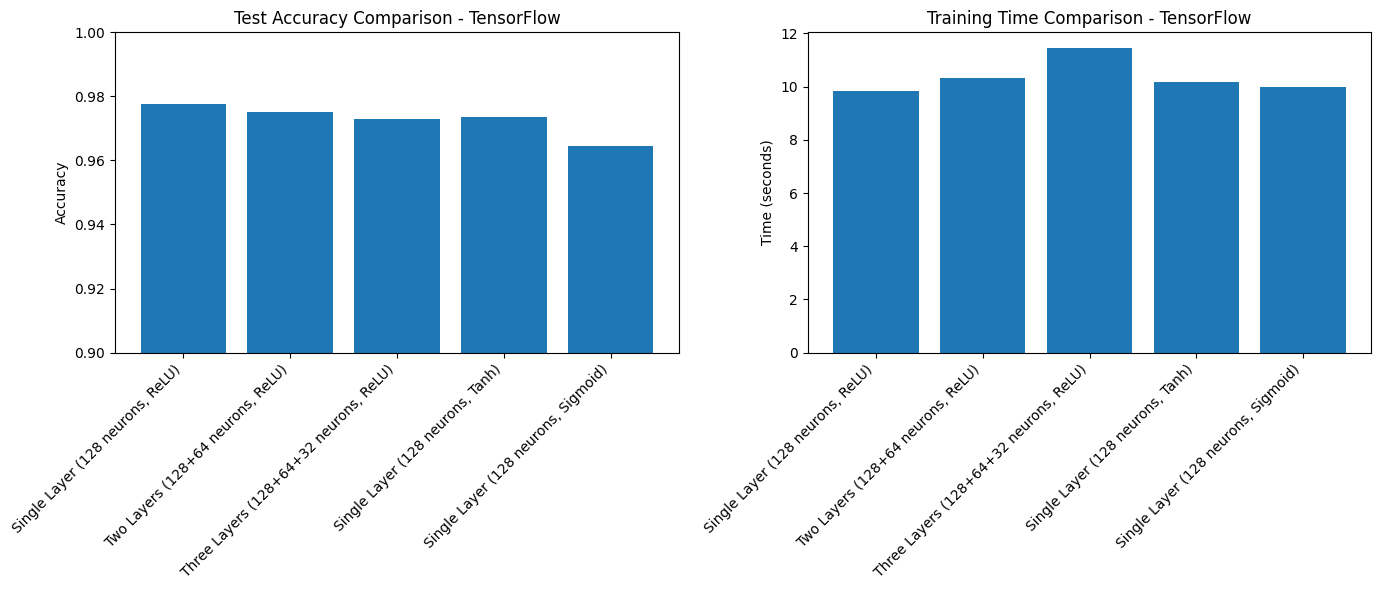


Best TensorFlow model: Single Layer (128 neurons, ReLU) with accuracy 0.9776


In [21]:
def run_tensorflow_experiments():
    experiments = [
        {
            "name": "Single Layer (128 neurons, ReLU)",
            "hidden_layers": [(128, 'relu')],
        },
        {
            "name": "Two Layers (128+64 neurons, ReLU)",
            "hidden_layers": [(128, 'relu'), (64, 'relu')],
        },
        {
            "name": "Three Layers (128+64+32 neurons, ReLU)",
            "hidden_layers": [(128, 'relu'), (64, 'relu'), (32, 'relu')],
        },
        {
            "name": "Single Layer (128 neurons, Tanh)",
            "hidden_layers": [(128, 'tanh')],
        },
        {
            "name": "Single Layer (128 neurons, Sigmoid)",
            "hidden_layers": [(128, 'sigmoid')],
        }
    ]
    
    results = []
    
    for exp in experiments:
        model = create_tensorflow_model(
            hidden_layers=exp["hidden_layers"],
            experiment_name=exp["name"]
        )
        
        # Train the model
        model, history, accuracy, training_time = train_tensorflow_model(
            model,
            experiment_name=exp["name"],
            epochs=10  # Fixed number of epochs for fair comparison
        )
        
        # Visualize the results
        y_pred = visualize_tf_results(model, history, exp["name"])
        
        # Store results for comparison
        results.append({
            "name": exp["name"],
            "model": model,
            "history": history,
            "accuracy": accuracy,
            "training_time": training_time,
            "hidden_layers": exp["hidden_layers"],
            "num_layers": len(exp["hidden_layers"])
        })
    
    # Create a comparison table
    comparison_data = []
    for result in results:
        comparison_data.append({
            "Experiment": result["name"],
            "Num Hidden Layers": result["num_layers"],
            "Hidden Layers": [f"{units} ({activation})" for units, activation in result["hidden_layers"]],
            "Test Accuracy": result["accuracy"],
            "Training Time (s)": result["training_time"]
        })
    
    comparison_df = pd.DataFrame(comparison_data)
    print("\nTensorFlow Experiments Comparison:")
    print(comparison_df)
    
    # Plot comparison of results
    plt.figure(figsize=(14, 6))
    
    # Accuracy comparison
    plt.subplot(1, 2, 1)
    plt.bar(comparison_df["Experiment"], comparison_df["Test Accuracy"])
    plt.title('Test Accuracy Comparison - TensorFlow')
    plt.ylabel('Accuracy')
    plt.ylim(0.9, 1.0)  # Adjust as needed
    plt.xticks(rotation=45, ha='right')
    
    # Training time comparison
    plt.subplot(1, 2, 2)
    plt.bar(comparison_df["Experiment"], comparison_df["Training Time (s)"])
    plt.title('Training Time Comparison - TensorFlow')
    plt.ylabel('Time (seconds)')
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    
    return comparison_df, results

tf_comparison_df, tf_results = run_tensorflow_experiments()

best_tf_model = max(tf_results, key=lambda x: x["accuracy"])
print(f"\nBest TensorFlow model: {best_tf_model['name']} with accuracy {best_tf_model['accuracy']:.4f}")

## 4. Parameter Variations with TensorFlow


Hyperparameter Tuning Experiments
Using best architecture from previous experiments: Single Layer (128 neurons, ReLU)

Experiment name: Hyperparameter Tuning - Baseline
Hidden layers: [(128, 'relu')]


d:\facultate\Semestrul 4\FML\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)


Experiment name Hyperparameter Tuning - Baseline
Validation split: 0.2
Learning rate: 0.001
Batch size: 128
Epochs: 10
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8143 - loss: 0.6747 - val_accuracy: 0.9393 - val_loss: 0.2144
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9450 - loss: 0.1956 - val_accuracy: 0.9572 - val_loss: 0.1575
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9602 - loss: 0.1412 - val_accuracy: 0.9641 - val_loss: 0.1263
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9700 - loss: 0.1042 - val_accuracy: 0.9655 - val_loss: 0.1163
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9758 - loss: 0.0858 - val_accuracy: 0.9691 - val_loss: 0.1022
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9813 - loss: 0.0681 - val_accuracy: 0.9693 - val_loss: 0.1008
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9846 - loss: 0.0563 - val_accuracy: 0.9723 - v

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)


Experiment name Hyperparameter Tuning - Small Batch Size
Validation split: 0.2
Learning rate: 0.001
Batch size: 32
Epochs: 10
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8704 - loss: 0.4645 - val_accuracy: 0.9544 - val_loss: 0.1585
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9600 - loss: 0.1350 - val_accuracy: 0.9663 - val_loss: 0.1142
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9756 - loss: 0.0845 - val_accuracy: 0.9722 - val_loss: 0.0946
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9822 - loss: 0.0623 - val_accuracy: 0.9715 - val_loss: 0.0907
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9858 - loss: 0.0477 - val_accuracy: 0.9706 - val_loss: 0.0999
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9893 - loss: 0.0360 - val_accuracy: 0.9737 - val_loss: 0.0905
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9928 - loss: 0.0267 - val

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)


Experiment name Hyperparameter Tuning - Large Batch Size
Validation split: 0.2
Learning rate: 0.001
Batch size: 256
Epochs: 10
Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7619 - loss: 0.8610 - val_accuracy: 0.9300 - val_loss: 0.2565
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9315 - loss: 0.2392 - val_accuracy: 0.9461 - val_loss: 0.1891
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9491 - loss: 0.1783 - val_accuracy: 0.9562 - val_loss: 0.1556
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9600 - loss: 0.1399 - val_accuracy: 0.9592 - val_loss: 0.1379
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9667 - loss: 0.1156 - val_accuracy: 0.9628 - val_loss: 0.1236
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9742 - loss: 0.0952 - val_accuracy: 0.9656 - val_loss: 0.1149
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9769 - loss: 0.0825 - val_accuracy: 0.

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)


Experiment name Hyperparameter Tuning - Low Learning Rate
Validation split: 0.2
Learning rate: 0.0001
Batch size: 128
Epochs: 10
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5693 - loss: 1.5756 - val_accuracy: 0.8777 - val_loss: 0.5238
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8811 - loss: 0.4954 - val_accuracy: 0.9047 - val_loss: 0.3651
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9034 - loss: 0.3717 - val_accuracy: 0.9135 - val_loss: 0.3126
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9154 - loss: 0.3163 - val_accuracy: 0.9213 - val_loss: 0.2825
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9215 - loss: 0.2897 - val_accuracy: 0.9291 - val_loss: 0.2613
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9278 - loss: 0.2622 - val_accuracy: 0.9335 - val_loss: 0.2449
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9328 - loss: 0.2463 - val_accuracy: 

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)


Experiment name Hyperparameter Tuning - High Learning Rate
Validation split: 0.2
Learning rate: 0.01
Batch size: 128
Epochs: 10
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8630 - loss: 0.4343 - val_accuracy: 0.9595 - val_loss: 0.1326
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9636 - loss: 0.1149 - val_accuracy: 0.9642 - val_loss: 0.1183
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9736 - loss: 0.0864 - val_accuracy: 0.9679 - val_loss: 0.1122
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9782 - loss: 0.0666 - val_accuracy: 0.9678 - val_loss: 0.1201
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9812 - loss: 0.0593 - val_accuracy: 0.9691 - val_loss: 0.1194
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9840 - loss: 0.0526 - val_accuracy: 0.9677 - val_loss: 0.1404
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9833 - loss: 0.0543 - val_accuracy: 0

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)


Experiment name Hyperparameter Tuning - More Epochs
Validation split: 0.2
Learning rate: 0.001
Batch size: 128
Epochs: 20
Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8069 - loss: 0.7081 - val_accuracy: 0.9439 - val_loss: 0.2094
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9441 - loss: 0.1982 - val_accuracy: 0.9547 - val_loss: 0.1569
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9605 - loss: 0.1403 - val_accuracy: 0.9595 - val_loss: 0.1374
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9707 - loss: 0.1054 - val_accuracy: 0.9646 - val_loss: 0.1213
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9760 - loss: 0.0848 - val_accuracy: 0.9666 - val_loss: 0.1105
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9807 - loss: 0.0703 - val_accuracy: 0.9706 - val_loss: 0.0976
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9836 - loss: 0.0603 - val_accuracy: 0.9723 

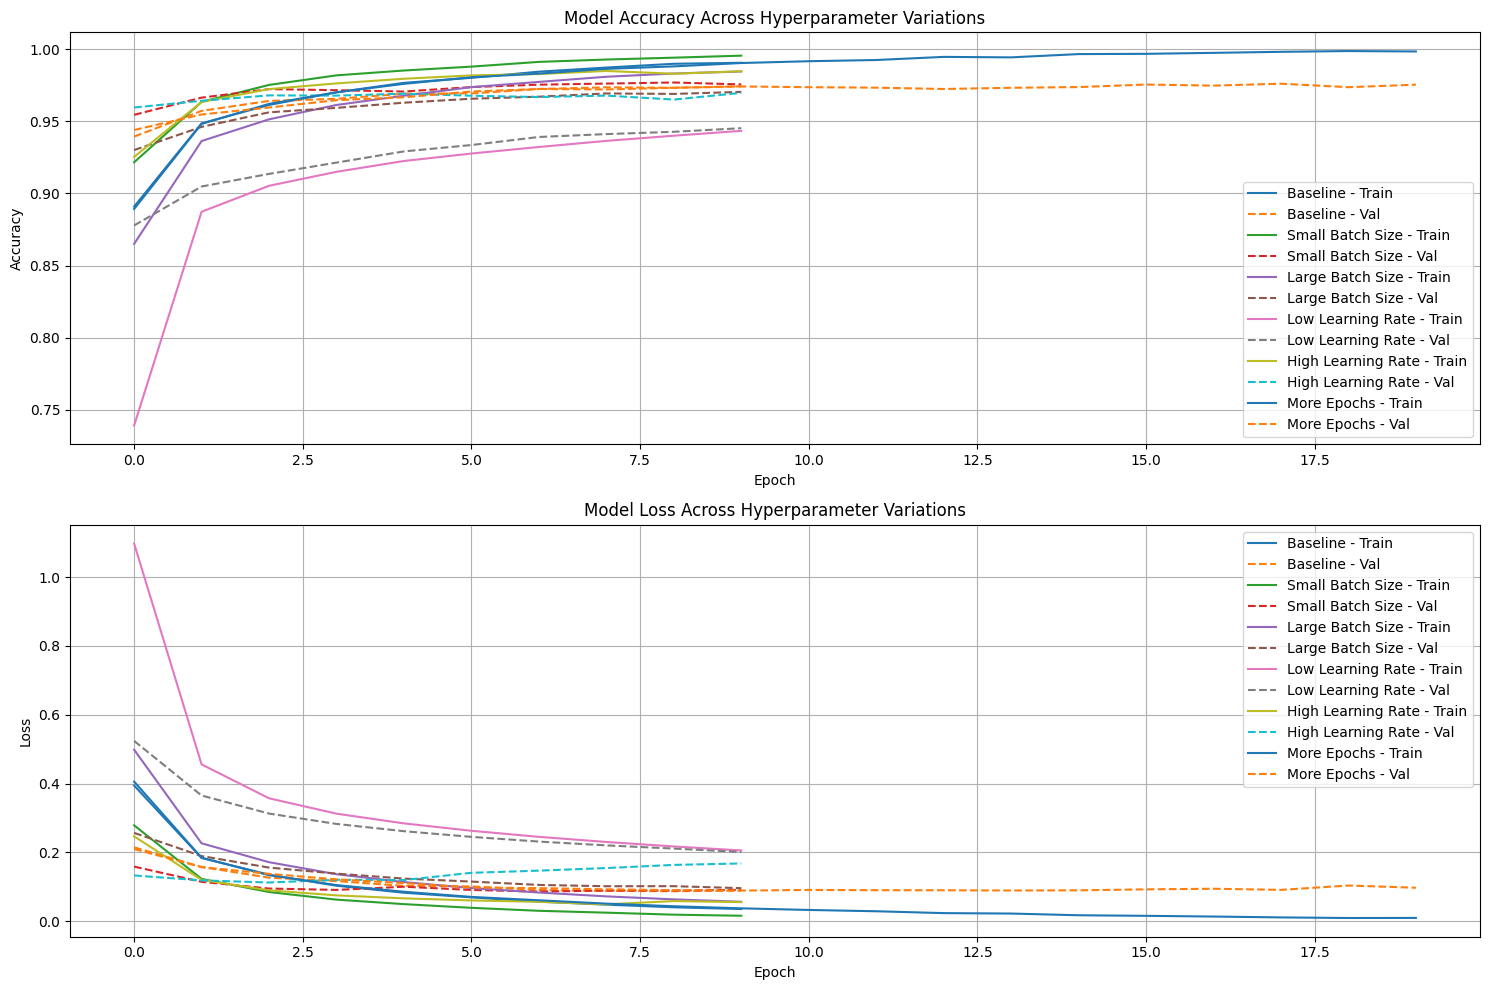


Hyperparameter Variation Comparison:
           Experiment  Validation Split  Learning Rate  Batch Size  Epochs  \
0            Baseline               0.2         0.0010         128      10   
1    Small Batch Size               0.2         0.0010          32      10   
2    Large Batch Size               0.2         0.0010         256      10   
3   Low Learning Rate               0.2         0.0001         128      10   
4  High Learning Rate               0.2         0.0100         128      10   
5         More Epochs               0.2         0.0010         128      20   

   Test Accuracy  Training Time (s)  
0         0.9752          10.796832  
1         0.9764          21.852308  
2         0.9735           5.176529  
3         0.9444           8.283057  
4         0.9682           8.391353  
5         0.9772          15.841715  


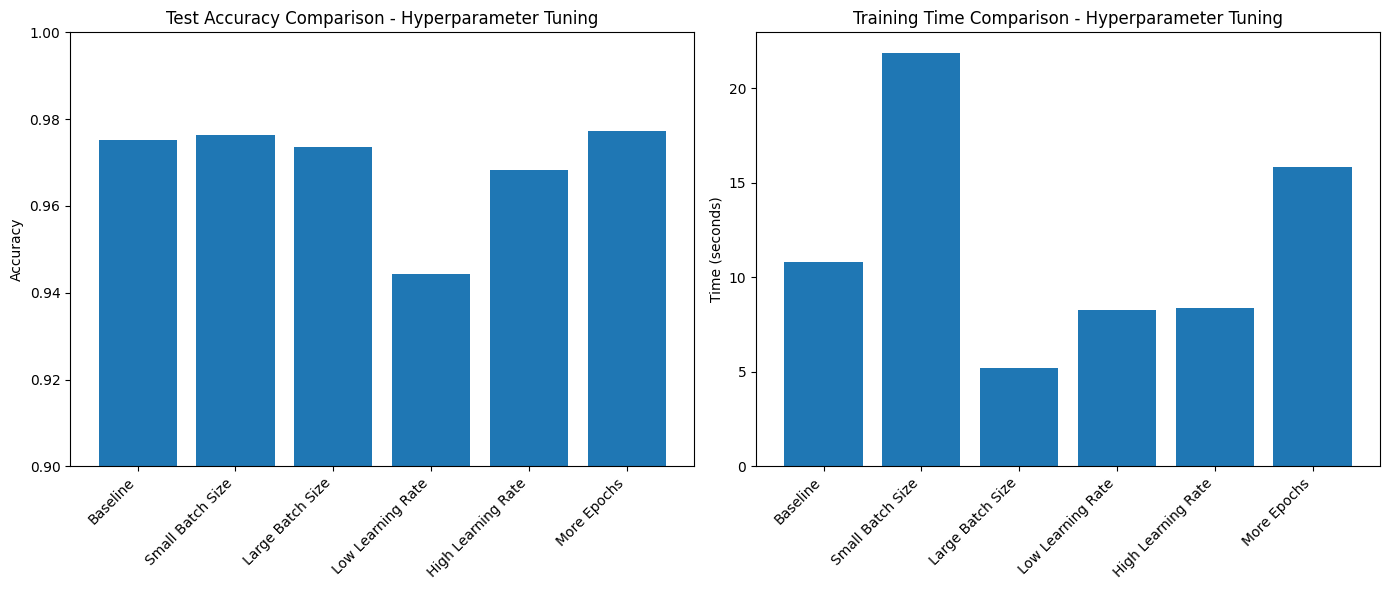


Best hyperparameter configuration: More Epochs with accuracy 0.9772


In [22]:
def experiment_with_hyperparameters():
    # Get the best architecture
    best_tf_arch = best_tf_model["hidden_layers"]
    best_arch_name = best_tf_model["name"]
    
    print("\nHyperparameter Tuning Experiments")
    print(f"Using best architecture from previous experiments: {best_arch_name}")
    
    # Define hyperparameter variations
    variations = [
        {
            "name": "Baseline",
            "validation_split": 0.2,
            "learning_rate": 0.001,
            "batch_size": 128,
            "epochs": 10
        },
        {
            "name": "Small Batch Size",
            "validation_split": 0.2,
            "learning_rate": 0.001,
            "batch_size": 32,
            "epochs": 10
        },
        {
            "name": "Large Batch Size",
            "validation_split": 0.2,
            "learning_rate": 0.001,
            "batch_size": 256,
            "epochs": 10
        },
        {
            "name": "Low Learning Rate",
            "validation_split": 0.2,
            "learning_rate": 0.0001,
            "batch_size": 128,
            "epochs": 10
        },
        {
            "name": "High Learning Rate",
            "validation_split": 0.2,
            "learning_rate": 0.01,
            "batch_size": 128,
            "epochs": 10
        },
        {
            "name": "More Epochs",
            "validation_split": 0.2,
            "learning_rate": 0.001,
            "batch_size": 128,
            "epochs": 20
        }
    ]
    
    results = []
    
    for params in variations:
        # Create model with the best architecture
        model = create_tensorflow_model(
            hidden_layers=best_tf_arch,
            experiment_name=f"Hyperparameter Tuning - {params['name']}"
        )
        
        # Train the model with different hyperparameters
        model, history, accuracy, training_time = train_tensorflow_model(
            model,
            validation_split=params["validation_split"],
            learning_rate=params["learning_rate"],
            batch_size=params["batch_size"],
            epochs=params["epochs"],
            experiment_name=f"Hyperparameter Tuning - {params['name']}"
        )
        
        # Store results
        results.append({
            "name": params["name"],
            "params": params,
            "history": history,
            "accuracy": accuracy,
            "training_time": training_time
        })
    
    # Plot accuracy and loss curves for all experiments
    plt.figure(figsize=(15, 10))
    
    # Plot accuracy
    plt.subplot(2, 1, 1)
    for result in results:
        plt.plot(result["history"].history['accuracy'], label=f'{result["name"]} - Train')
        plt.plot(result["history"].history['val_accuracy'], label=f'{result["name"]} - Val', linestyle='--')
    
    plt.title('Model Accuracy Across Hyperparameter Variations')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')
    plt.grid(True)
    
    # Plot loss
    plt.subplot(2, 1, 2)
    for result in results:
        plt.plot(result["history"].history['loss'], label=f'{result["name"]} - Train')
        plt.plot(result["history"].history['val_loss'], label=f'{result["name"]} - Val', linestyle='--')
    
    plt.title('Model Loss Across Hyperparameter Variations')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Create a comparison table
    comparison_data = []
    for result in results:
        comparison_data.append({
            "Experiment": result["name"],
            "Validation Split": result["params"]["validation_split"],
            "Learning Rate": result["params"]["learning_rate"],
            "Batch Size": result["params"]["batch_size"],
            "Epochs": result["params"]["epochs"],
            "Test Accuracy": result["accuracy"],
            "Training Time (s)": result["training_time"]
        })
    
    comparison_df = pd.DataFrame(comparison_data)
    print("\nHyperparameter Variation Comparison:")
    print(comparison_df)
    
    # Plot comparison of results
    plt.figure(figsize=(14, 6))
    
    # Accuracy comparison
    plt.subplot(1, 2, 1)
    plt.bar(comparison_df["Experiment"], comparison_df["Test Accuracy"])
    plt.title('Test Accuracy Comparison - Hyperparameter Tuning')
    plt.ylabel('Accuracy')
    plt.ylim(0.9, 1.0)
    plt.xticks(rotation=45, ha='right')
    
    # Training time comparison
    plt.subplot(1, 2, 2)
    plt.bar(comparison_df["Experiment"], comparison_df["Training Time (s)"])
    plt.title('Training Time Comparison - Hyperparameter Tuning')
    plt.ylabel('Time (seconds)')
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    
    return comparison_df, results

# Run hyperparameter tuning experiments
hyperparameter_comparison_df, hyperparameter_results = experiment_with_hyperparameters()

# Select the best model based on accuracy
best_hyperparameter_model = max(hyperparameter_results, key=lambda x: x["accuracy"])
print(f"\nBest hyperparameter configuration: {best_hyperparameter_model['name']} with accuracy {best_hyperparameter_model['accuracy']:.4f}")

## 5. Performance Comparison between Scikit-learn and TensorFlow

# Create a dataframe to compare the two implementations

In [23]:
comparison_data = [{
    "Implementation": "Scikit-learn MLPClassifier",
    "Model": best_sklearn_model["name"],
    "Test Accuracy": best_sklearn_model["accuracy"],
    "Training Time (s)": best_sklearn_model["training_time"],
},{
    "Implementation": "TensorFlow",
    "Model": best_tf_model["name"],
    "Test Accuracy": best_tf_model["accuracy"],
    "Training Time (s)": best_tf_model["training_time"],
},{
    "Implementation": "TensorFlow + Hyperparameter Tuning",
    "Model": best_hyperparameter_model["name"],
    "Test Accuracy": best_hyperparameter_model["accuracy"],
    "Training Time (s)": best_hyperparameter_model["training_time"],
}]

comparison_df = pd.DataFrame(comparison_data)
print("\nBest Models Comparison:")
print(comparison_df)


Best Models Comparison:
                       Implementation                                   Model  \
0          Scikit-learn MLPClassifier  Three Layers (128+64+32 neurons, ReLU)   
1                          TensorFlow        Single Layer (128 neurons, ReLU)   
2  TensorFlow + Hyperparameter Tuning                             More Epochs   

   Test Accuracy  Training Time (s)  
0         0.9796         125.007986  
1         0.9776           9.832386  
2         0.9772          15.841715  


# Create a bar chart to visualize the comparison

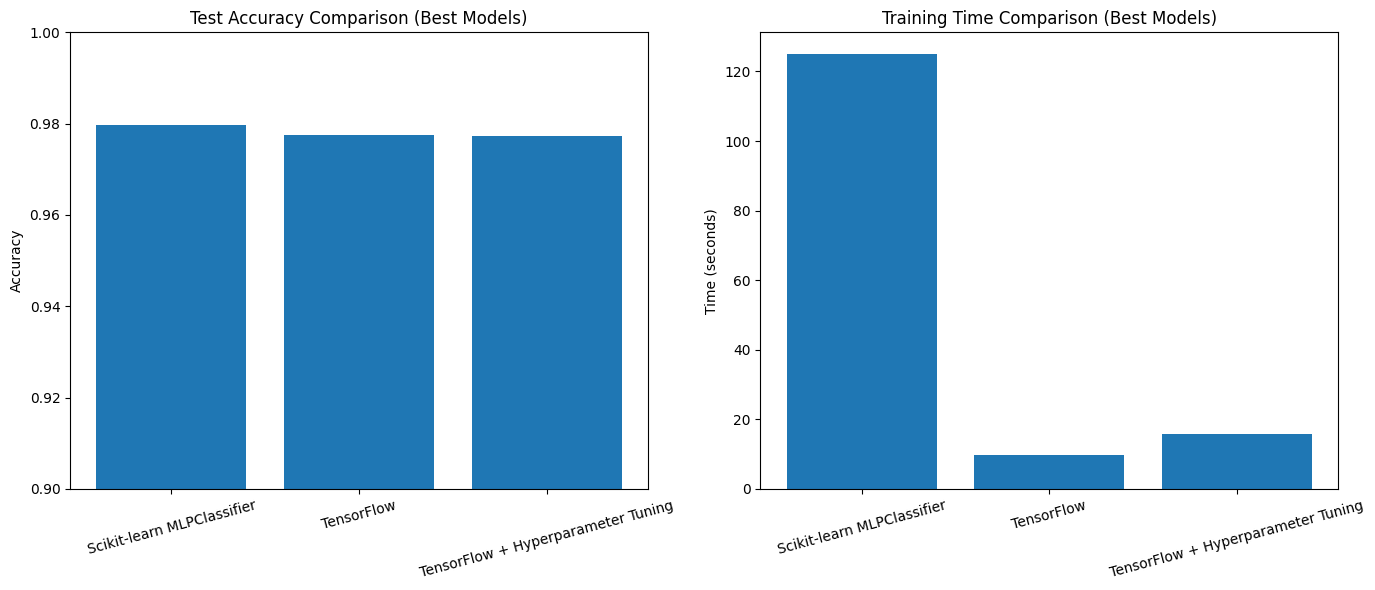

In [24]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(comparison_df["Implementation"], comparison_df["Test Accuracy"])
plt.title('Test Accuracy Comparison (Best Models)')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)
plt.xticks(rotation=15)

plt.subplot(1, 2, 2)
plt.bar(comparison_df["Implementation"], comparison_df["Training Time (s)"])
plt.title('Training Time Comparison (Best Models)')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

## 6. Conclusion

              Framework                              Experiment  Accuracy  \
0          Scikit-learn        Single Layer (128 neurons, ReLU)    0.9778   
1          Scikit-learn       Two Layers (128+64 neurons, ReLU)    0.9777   
2          Scikit-learn  Three Layers (128+64+32 neurons, ReLU)    0.9796   
3          Scikit-learn        Single Layer (128 neurons, Tanh)    0.9782   
4          Scikit-learn    Single Layer (128 neurons, Logistic)    0.9788   
5            TensorFlow        Single Layer (128 neurons, ReLU)    0.9776   
6            TensorFlow       Two Layers (128+64 neurons, ReLU)    0.9750   
7            TensorFlow  Three Layers (128+64+32 neurons, ReLU)    0.9730   
8            TensorFlow        Single Layer (128 neurons, Tanh)    0.9736   
9            TensorFlow     Single Layer (128 neurons, Sigmoid)    0.9645   
10  TensorFlow (Tuning)                                Baseline    0.9752   
11  TensorFlow (Tuning)                        Small Batch Size    0.9764   

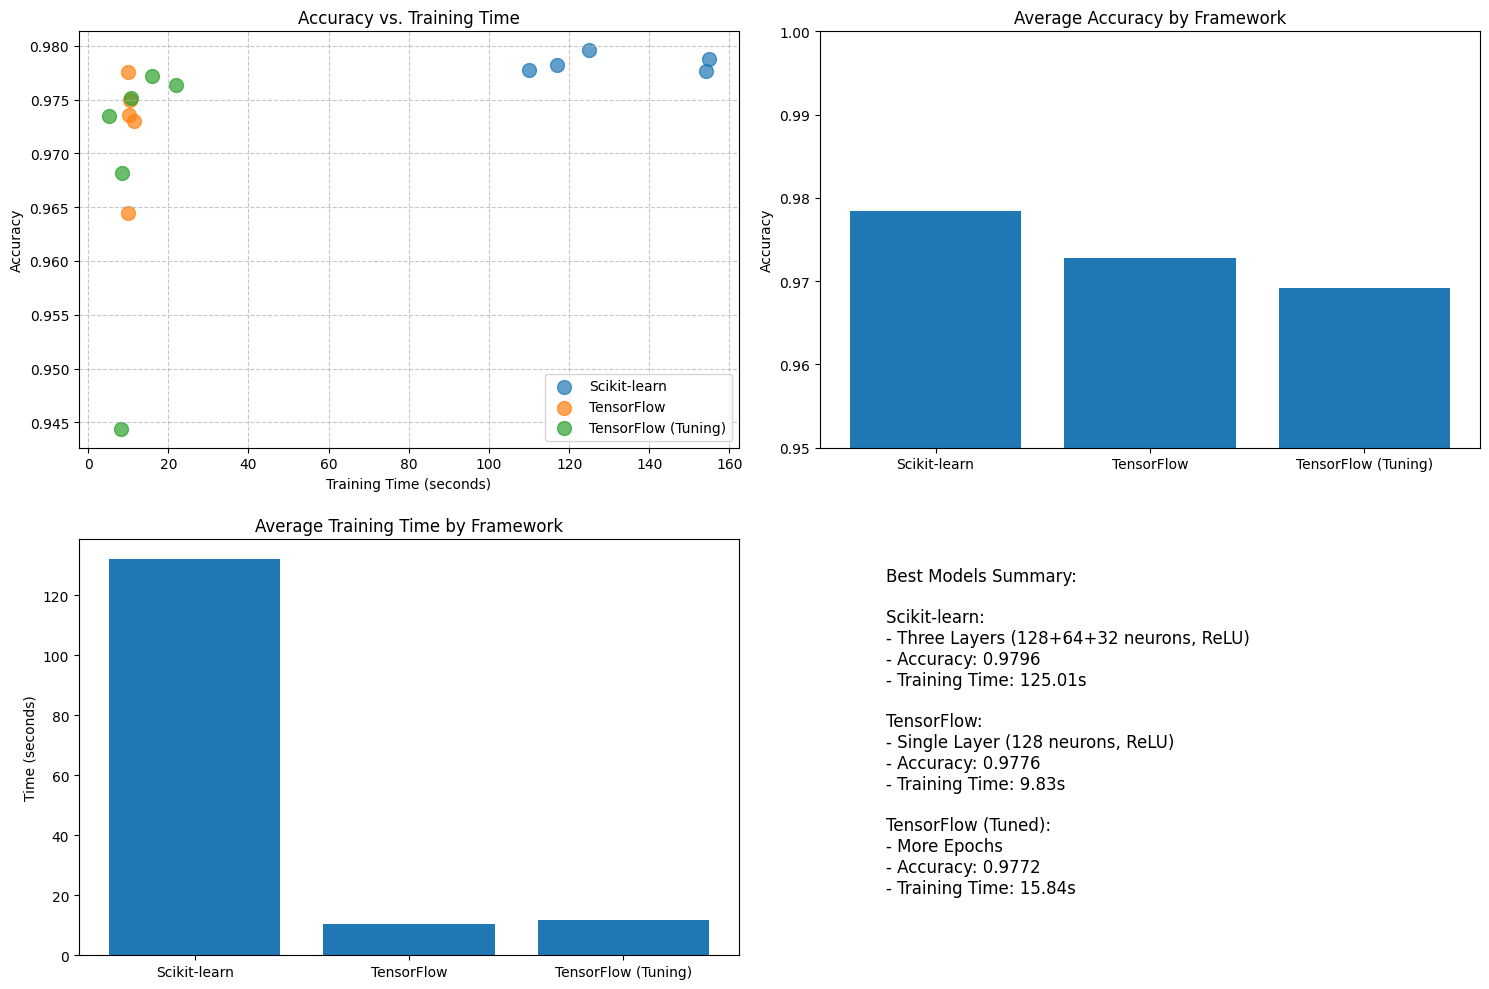

In [25]:
plt.figure(figsize=(15, 10))

all_experiments = []

# Add Scikit-learn results
for result in sklearn_results:
    all_experiments.append({
        "Framework": "Scikit-learn",
        "Experiment": result["name"],
        "Accuracy": result["accuracy"],
        "Training Time": result["training_time"]
    })

# Add TensorFlow results
for result in tf_results:
    all_experiments.append({
        "Framework": "TensorFlow",
        "Experiment": result["name"],
        "Accuracy": result["accuracy"],
        "Training Time": result["training_time"]
    })

# Add hyperparameter tuning results
for result in hyperparameter_results:
    all_experiments.append({
        "Framework": "TensorFlow (Tuning)",
        "Experiment": result["name"],
        "Accuracy": result["accuracy"],
        "Training Time": result["training_time"]
    })

# Convert to DataFrame
all_experiments_df = pd.DataFrame(all_experiments)
print(all_experiments_df)

# Create a scatter plot to visualize the trade-off between accuracy and training time
plt.subplot(2, 2, 1)
for framework in all_experiments_df["Framework"].unique():
    df_subset = all_experiments_df[all_experiments_df["Framework"] == framework]
    plt.scatter(df_subset["Training Time"], df_subset["Accuracy"], label=framework, alpha=0.7, s=100)

plt.title('Accuracy vs. Training Time')
plt.xlabel('Training Time (seconds)')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Create grouped bar charts for comparison
frameworks = all_experiments_df["Framework"].unique()
skl_acc = all_experiments_df[all_experiments_df["Framework"] == "Scikit-learn"]["Accuracy"].mean()
tf_acc = all_experiments_df[all_experiments_df["Framework"] == "TensorFlow"]["Accuracy"].mean()
tf_tune_acc = all_experiments_df[all_experiments_df["Framework"] == "TensorFlow (Tuning)"]["Accuracy"].mean()

skl_time = all_experiments_df[all_experiments_df["Framework"] == "Scikit-learn"]["Training Time"].mean()
tf_time = all_experiments_df[all_experiments_df["Framework"] == "TensorFlow"]["Training Time"].mean()
tf_tune_time = all_experiments_df[all_experiments_df["Framework"] == "TensorFlow (Tuning)"]["Training Time"].mean()

# Average accuracy by framework
plt.subplot(2, 2, 2)
plt.bar(["Scikit-learn", "TensorFlow", "TensorFlow (Tuning)"], [skl_acc, tf_acc, tf_tune_acc])
plt.title('Average Accuracy by Framework')
plt.ylabel('Accuracy')
plt.ylim(0.95, 1.0)

# Average training time by framework
plt.subplot(2, 2, 3)
plt.bar(["Scikit-learn", "TensorFlow", "TensorFlow (Tuning)"], [skl_time, tf_time, tf_tune_time])
plt.title('Average Training Time by Framework')
plt.ylabel('Time (seconds)')

# Display best models
plt.subplot(2, 2, 4)
plt.axis('off')
best_models_text = f"""
Best Models Summary:

Scikit-learn: 
- {best_sklearn_model['name']}
- Accuracy: {best_sklearn_model['accuracy']:.4f}
- Training Time: {best_sklearn_model['training_time']:.2f}s

TensorFlow:
- {best_tf_model['name']}
- Accuracy: {best_tf_model['accuracy']:.4f}
- Training Time: {best_tf_model['training_time']:.2f}s

TensorFlow (Tuned):
- {best_hyperparameter_model['name']}
- Accuracy: {best_hyperparameter_model['accuracy']:.4f}
- Training Time: {best_hyperparameter_model['training_time']:.2f}s
"""
plt.text(0.1, 0.1, best_models_text, fontsize=12)

plt.tight_layout()
plt.show()